**IMPORTS**

In [5]:
import talib
import pandas as pd
from talib import SMA
from talib import T3
from talib import WMA
from talib.abstract import *
import matplotlib.pyplot as plt


**GETTING CSV**

In [2]:
def get_df(csv):
    df=pd.read_csv(csv)
    return df

In [10]:
import requests
response = requests.get('https://api.coinmetrics.io/v4/catalog/assets?pretty=true&api_key=<your_key>').json()
print(response)

{'error': {'type': 'wrong_credentials', 'message': 'Supplied credentials are not valid.'}}


**MOVING AVERAGE**

*SMA* = Simple Moving Average. calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average.

*T3* = Triple Exponential Moving Average.  takes multiple exponential moving averages (EMA) of the original EMA and subtracting out some of the lag.

*WMA* = Weighted Moving Average. The weighted moving average is calculated by multiplying each observation in the data set by a predetermined weighting factor

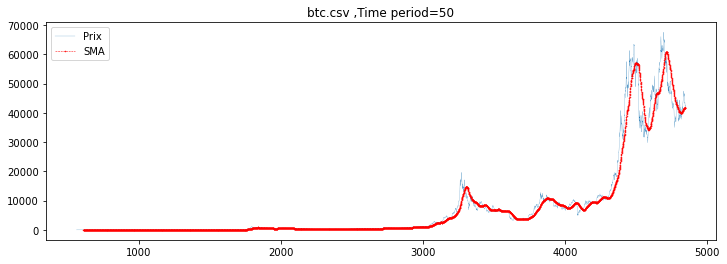

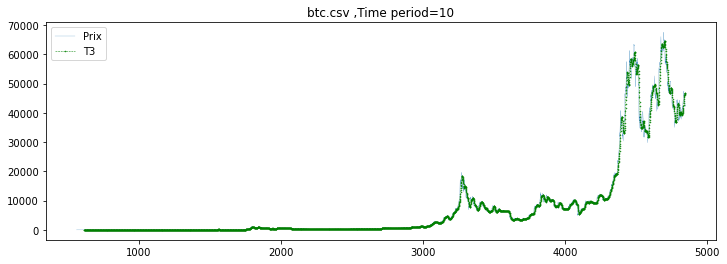

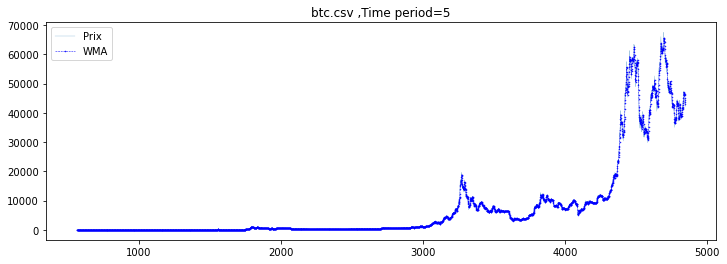

In [8]:
def get_graphe_comp(csv,TA,timep):
    df=get_df(csv)
    if(TA=='SMA'):
        df[TA] = SMA(df['PriceUSD'],timep) 
        color='red'
    if(TA=='T3'):
        df[TA] = T3(df['PriceUSD'],timep)
        color='green'
    if(TA=='WMA'):
        df[TA] = WMA(df['PriceUSD'],timep) 
        color='blue'
    fig, ax = plt.subplots(figsize = (12, 4))
    
    ax.plot(df["PriceUSD"], linestyle='-', 
            linewidth=0.2, label='Prix')
    ax.plot(df[TA],marker='.',markersize=1,color=color,linestyle='--', linewidth=0.5, label=TA)
    ax.legend();
    plt.title(csv+" ,Time period="+str(timep))

get_graphe_comp('btc.csv','SMA',50)
get_graphe_comp('btc.csv','T3',10)
get_graphe_comp('btc.csv','WMA',5)